In [ ]:
import numpy as np

In [ ]:
# create err_x as a linspace from 0 to 2
err_x = np.linspace(0, 2, 100)

In [ ]:
reward = 1.0 - np.clip(err_x, 0, 2)*0.5
reward -= np.clip(np.log(err_x+1)*5, 0, 1)*0.1 # for 0.2
reward -= np.clip(np.log(err_x+1)*10, 0, 1)*0.1 # for 0.1
reward -= np.clip(np.log(err_x+1)*20, 0, 1)*0.1 # for 0.05
reward -= np.clip(np.log(err_x+1)*50, 0, 1)*0.1 # for 0.02

In [ ]:
# plot reward
import matplotlib.pyplot as plt
plt.plot(err_x, reward)
# add labels
plt.xlabel('err_x')
plt.ylabel('reward')

In [ ]:
import torch
from icecream import ic
import matplotlib.pyplot as plt

In [ ]:
'''
create a function with is the output of a set of three-order polynomial function
the input dimension is input_dim 
the output dimension is output_dim
'''
input_dim = 4
output_dim = 2
seed = 0
# create a random matrix with shape (input_dim, output_dim)
# the values are from a uniform distribution between -1 and 1
torch.random.set_rng_state(torch.manual_seed(1024).get_state())
torch.manual_seed(seed)
# create a function
def f(x):
    matrix = torch.rand((output_dim, input_dim,input_dim))*2-1
    vector = torch.rand((output_dim))*2-1
    # x:Tensor(batch_size, input_dim) y:Tensor(batch_size, output_dim)
    # quadratic function
    y = vector + torch.einsum('bi,oij,bj->bo', x, matrix, x)
    return y/input_dim

In [ ]:
# generate input signal as input_dim number of sin signal with different frequncy and phase 
input_signal = torch.zeros((100, input_dim))
for i in range(input_dim):
    input_signal[:,i] = torch.sin(torch.linspace(0, 2*torch.pi, 100)*(i+1) + torch.rand(1)*torch.pi)
output = f(input_signal)

In [ ]:
# plot input and output
plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
plt.plot(input_signal.numpy())
plt.legend(['input_signal_1', 'input_signal_2', 'input_signal_3', 'input_signal_4'])
plt.xlabel('time step')
plt.ylabel('input_signal')
plt.subplot(1, 2, 2)
plt.plot(output.numpy())
plt.legend(['output_1', 'output_2'])
plt.xlabel('time step')
plt.ylabel('output')

In [ ]:
import torch
seed=0
torch.random.set_rng_state(torch.manual_seed(1024).get_state())
torch.manual_seed(seed)
print(torch.rand(1))
torch.random.set_rng_state(torch.manual_seed(1024).get_state())
torch.manual_seed(seed)
print(torch.rand(1))

Text(0, 0.5, 'velocity')

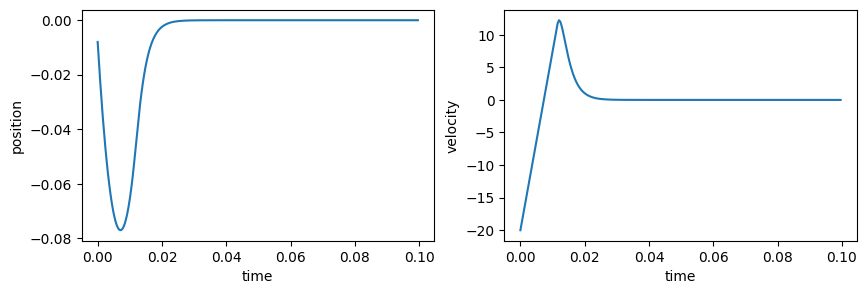

In [23]:
import numpy as np

# create a Mass-spring-damper model

# define the parameters
g = 9.81
m1 = 0.027 # mass
m2 = 0.01
m = (m1*m2)/(m1+m2)
rope_zeta = 0.95
rope_wn = 500
dt = 4e-4

x = 0.0
v = -20

xs = []
vs = []
ts = []

for i in range(int(0.1/(4e-4))):
    t = i * dt
    f = np.clip(m * ( - (rope_wn ** 2) * x - 2 * rope_zeta * rope_wn * v) * float(x<0.0) - m * g, -20, 20)
    a = f / m
    v += a * dt
    x += v * dt
    xs.append(x)
    vs.append(v)
    ts.append(t)

import matplotlib.pyplot as plt
# plot the result in 2 subplots
plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
plt.plot(ts, xs)
plt.xlabel('time')
plt.ylabel('position')
plt.subplot(1, 2, 2)
plt.plot(ts, vs)
plt.xlabel('time')
plt.ylabel('velocity')
